# Regional Economic Performance Analysis Based on Macroeconomic Indicators of Five High-Performing Countries

## Importing Basic Needed Packages

In [ ]:
import pandas as pd #data loading, exploration and manipulation
import numpy as np #for numerical analysis
import matplotlib.pyplot as plt #to create and format visualization
import seaborn as sns #advanced visualization
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Exploration

The dataset to be used has been downloaded from kaggle and it consists of year-wise macroeconomic indicators
covering more than 200 countries.  
 https://www.kaggle.com/datasets/tanishksharma9905/global-economic-indicators-20102025/data

In [ ]:
#import the dataset
df = pd.read_csv('world_bank_data_2025.csv')
#check the first five rows
df.head()

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


In [ ]:
#check the last five rows
df.tail()

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
3467,Zimbabwe,zw,2021,98.546105,2.724052e+10,1724.387731,9.540,-31.795551,113.294981,8.468017,1.278300,NaN,NaN,NaN,2.662178e+10,NaN
3468,Zimbabwe,zw,2022,104.705171,3.278975e+10,2040.552459,10.087,-36.833393,266.987152,6.139263,0.930064,NaN,NaN,NaN,3.202694e+10,NaN
3469,Zimbabwe,zw,2023,NaN,3.523137e+10,2156.034004,8.759,-73.540441,921.535652,5.336730,0.379995,NaN,NaN,NaN,3.479607e+10,NaN
3470,Zimbabwe,zw,2024,NaN,NaN,NaN,8.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3471,Zimbabwe,zw,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     3472 non-null   object 
 1   country_id                       3472 non-null   object 
 2   year                             3472 non-null   int64  
 3   Inflation (CPI %)                2694 non-null   float64
 4   GDP (Current USD)                2933 non-null   float64
 5   GDP per Capita (Current USD)     2938 non-null   float64
 6   Unemployment Rate (%)            2795 non-null   float64
 7   Interest Rate (Real, %)          1735 non-null   float64
 8   Inflation (GDP Deflator, %)      2904 non-null   float64
 9   GDP Growth (% Annual)            2912 non-null   float64
 10  Current Account Balance (% GDP)  2563 non-null   float64
 11  Government Expense (% of GDP)    1820 non-null   float64
 12  Government Revenue (

In [ ]:
#statistical description of the data for all the columns
df.describe(include='all')

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
count,3472,3472,3472.000000,2694.000000,2.933000e+03,2938.000000,2795.000000,1735.000000,2904.000000,2912.000000,2563.000000,1820.000000,1829.000000,1833.000000,2.796000e+03,852.000000
unique,217,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Aruba,aw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2017.500000,6.233154,3.964323e+11,18483.495612,7.841141,5.405051,6.634865,2.853544,-2.363241,27.325359,26.677467,16.969924,4.142237e+11,61.863736
std,NaN,NaN,4.610436,19.726903,1.749315e+12,27301.814024,5.964358,9.740924,25.820196,6.053786,13.740986,12.642464,18.116253,8.218539,1.799783e+12,40.409792
min,NaN,NaN,2010.000000,-6.687321,3.210541e+07,193.007146,0.100000,-81.132121,-28.760135,-54.336155,-60.877754,0.000136,0.000081,0.000063,5.107533e+07,1.845685
25%,NaN,NaN,2013.750000,1.402112,6.264757e+09,2280.748732,3.611000,1.734057,1.218347,0.997032,-7.496525,17.511484,17.639153,12.285344,7.475538e+09,33.894232
50%,NaN,NaN,2017.500000,3.213523,2.587360e+10,6827.668145,5.771000,5.079009,3.223184,3.100442,-2.656009,26.000850,24.821425,16.321438,2.986520e+10,51.651469
75%,NaN,NaN,2021.250000,6.186626,1.874939e+11,23727.024581,10.731500,8.869434,6.905463,5.355110,1.854710,34.884582,32.700782,21.448658,1.972529e+11,81.930649


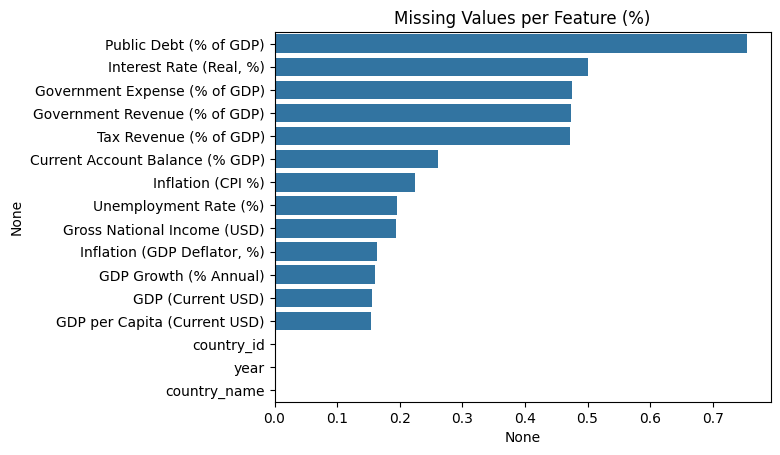

In [ ]:
#check for percentage of missing values for each colymn
missing = df.isnull().mean().sort_values(ascending=False)
sns.barplot(x=missing, y=missing.index)
plt.title("Missing Values per Feature (%)")
plt.show()

In [ ]:
#the real counts of the missing values per column
df.isna().sum()

,0
country_name,0
country_id,0
year,0
Inflation (CPI %),778
GDP (Current USD),539
GDP per Capita (Current USD),534
Unemployment Rate (%),677
"Interest Rate (Real, %)",1737
"Inflation (GDP Deflator, %)",568
GDP Growth (% Annual),560


In [ ]:
#brief exploration of the public debt
df[['country_name', 'year', 'Public Debt (% of GDP)']].head(20)

,country_name,year,Public Debt (% of GDP)
0,Aruba,2010,NaN
1,Aruba,2011,NaN
2,Aruba,2012,NaN
3,Aruba,2013,NaN
4,Aruba,2014,NaN
5,Aruba,2015,NaN
6,Aruba,2016,NaN
7,Aruba,2017,NaN
8,Aruba,2018,NaN
9,Aruba,2019,NaN


### Handling the missing values

Initial data check has shown number of missing values present in this dataset for each microecomic indicator. However, taking care of these missing values has to be strategic so as not to fill the missing values with wrong or misleading information. In this case, three indicators that has been chosen as the basis of the analysis will be taken care of and the rest will then depend on them.

These indicators are



*   GDP (Current USD): This measures the total monetary value of all finished goods and services produced within a country's borders in a specific time period, indicating the overall size and economic power of that country.

*   GDP Per Capita:  This measures the average economic output per person in a country by dividing the total GDP by the population, serving as a general indicator of the average standard of living and wealth of its residents.

*   GDP Growth: it measures the percentage change in a country's real economic output from one year to the next, indicating the speed and direction of economic expansion or contraction.





For these columns, more data has been downloaded from databank to compute for any countries that still has missing values for these columns which might be available in the other collected data

**Taking care of missing GDP Current (USD)**

In [ ]:
#load the other downloaded gdp current data
gdp_df1 = pd.read_csv('/content/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_130122.csv', skiprows=4)
gdp_df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.420993e+10,2.496326e+10,2.707802e+10,3.177483e+10,3.028492e+10,3.381219e+10,...,8.289612e+11,9.730251e+11,1.012291e+12,1.009747e+12,9.334072e+11,1.085605e+12,1.191639e+12,1.133818e+12,1.205974e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.715223e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.190511e+10,1.270803e+10,1.363092e+10,1.446926e+10,1.580394e+10,1.692124e+10,...,7.000282e+11,6.940513e+11,7.778404e+11,8.332889e+11,7.972952e+11,8.581145e+11,8.936399e+11,8.147285e+11,6.700257e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.487516e+10,8.039694e+10,NaN


In [ ]:
#melt the DataFrame to unstack the year columns
gdp_unstacked = gdp_df1.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='year',
    value_name='value',
    value_vars=[col for col in gdp_df1.columns if col.isdigit()],
    ignore_index=False
)

gdp_unstacked['year'] = gdp_unstacked['year'].astype(int)
gdp_unstacked = gdp_unstacked[['Country Name', 'year', 'value']]

gdp_unstacked.head()

,Country Name,year,value
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,2.420993e+10
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,1.190511e+10
4,Angola,1960,NaN


In [ ]:
#merge the gdp current data with the original data
merged_df = df.merge(gdp_unstacked,
                     left_on=['country_name', 'year'],
                     right_on=['Country Name', 'year'],
                     how='left')

#fill missing gdp current values in the original data with the ones from the collected gdp current data
df['GDP (Current USD)'] = df['GDP (Current USD)'].combine_first(merged_df['value'])

#display the updated DataFrame
display(df.head())
display(df.tail())

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
3467,Zimbabwe,zw,2021,98.546105,2.724052e+10,1724.387731,9.540,-31.795551,113.294981,8.468017,1.278300,NaN,NaN,NaN,2.662178e+10,NaN
3468,Zimbabwe,zw,2022,104.705171,3.278975e+10,2040.552459,10.087,-36.833393,266.987152,6.139263,0.930064,NaN,NaN,NaN,3.202694e+10,NaN
3469,Zimbabwe,zw,2023,NaN,3.523137e+10,2156.034004,8.759,-73.540441,921.535652,5.336730,0.379995,NaN,NaN,NaN,3.479607e+10,NaN
3470,Zimbabwe,zw,2024,NaN,4.418770e+10,NaN,8.554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3471,Zimbabwe,zw,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#check for the number of missing values after the imputation
df.isna().sum()

,0
country_name,0
country_id,0
year,0
Inflation (CPI %),778
GDP (Current USD),349
GDP per Capita (Current USD),534
Unemployment Rate (%),677
"Interest Rate (Real, %)",1737
"Inflation (GDP Deflator, %)",568
GDP Growth (% Annual),560


The results ahove shows that the number of missing gdp current has reduced after the imputation.

However, there are still a lot but further check will confirm the steps in taking care of the rest. First observation is to check for year 2025 and observe the data there

In [ ]:
df[df['year'] == 2025].head(20)

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
15,Aruba,aw,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Afghanistan,af,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Angola,ao,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Albania,al,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,Andorra,ad,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,United Arab Emirates,ae,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,Argentina,ar,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Armenia,am,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,American Samoa,as,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Antigua and Barbuda,ag,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This check has shown that almost all the data from 2025 are missing but further check is required to confirm this

In [ ]:
df[df['year'] == 2025].info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 15 to 3471
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     217 non-null    object 
 1   country_id                       217 non-null    object 
 2   year                             217 non-null    int64  
 3   Inflation (CPI %)                0 non-null      float64
 4   GDP (Current USD)                0 non-null      float64
 5   GDP per Capita (Current USD)     0 non-null      float64
 6   Unemployment Rate (%)            0 non-null      float64
 7   Interest Rate (Real, %)          0 non-null      float64
 8   Inflation (GDP Deflator, %)      0 non-null      float64
 9   GDP Growth (% Annual)            0 non-null      float64
 10  Current Account Balance (% GDP)  0 non-null      float64
 11  Government Expense (% of GDP)    0 non-null      float64
 12  Government Revenue (% of 

After checking the data info, it can be confirmed that the data has no information regarding 2025. This contributed to a lot of missing values available in the dataset and hence, 2025 will be removed. The Analysis will now be from 2010-2024 (representing the data available)

In [ ]:
#remove rows where the year is 2025
df = df[df['year'] != 2025]
df.isna().sum()

,0
country_name,0
country_id,0
year,0
Inflation (CPI %),561
GDP (Current USD),132
GDP per Capita (Current USD),317
Unemployment Rate (%),460
"Interest Rate (Real, %)",1520
"Inflation (GDP Deflator, %)",351
GDP Growth (% Annual),343


**Taking care of the missing GDP growth**

In [ ]:
gdp_growth_df = pd.read_csv('/content/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_130026.csv', skiprows=4)
gdp_growth_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.719625,7.048533,2.397086,-2.232442,-26.211820,24.132627,8.517918,4.263719,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.469708,7.868623,5.622472,4.689533,5.159536,...,2.195991,2.696238,2.665038,2.200340,-2.859784,4.563568,3.555769,1.891307,2.766804,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,-6.240172,2.266944,NaN,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.869637,3.725941,7.039191,5.364761,4.105616,...,0.194177,2.296168,2.904654,3.282163,-0.984117,4.030000,3.974964,3.357987,4.176103,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.580050,-0.147213,-1.316362,-0.702273,-5.638215,1.199211,3.044727,1.078100,4.423905,NaN


In [ ]:
gdp_growth_unstacked = gdp_growth_df.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='year',
    value_name='value',
    value_vars=[col for col in gdp_growth_df.columns if col.isdigit()],
    ignore_index=False
)

gdp_growth_unstacked['year'] = gdp_growth_unstacked['year'].astype(int)
gdp_growth_unstacked = gdp_growth_unstacked[['Country Name', 'year', 'value']]

gdp_growth_unstacked.head()

,Country Name,year,value
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN


In [ ]:
merged_df_growth = df.merge(gdp_growth_unstacked,
                            left_on=['country_name', 'year'],
                            right_on=['Country Name', 'year'],
                            how='left')
df['GDP Growth (% Annual)'] = df['GDP Growth (% Annual)'].combine_first(merged_df_growth['value'])
df = merged_df_growth.drop(columns=['Country Name', 'value'])

In [ ]:
df.isna().sum()

,0
country_name,0
country_id,0
year,0
Inflation (CPI %),561
GDP (Current USD),132
GDP per Capita (Current USD),317
Unemployment Rate (%),460
"Interest Rate (Real, %)",1520
"Inflation (GDP Deflator, %)",351
GDP Growth (% Annual),343


**Taking care of the missing GDP Per capita**

In [ ]:
gdp_per_capita = pd.read_csv('/content/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_134819.csv', skiprows=4)
gdp_per_capita.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,...,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1510.742951,1567.635839,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,...,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690,NaN


In [ ]:
#melt the DataFrame to unstack the year columns
gdp_per_capita_unstacked = gdp_per_capita.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='year',
    value_name='value',
    value_vars=[col for col in gdp_per_capita.columns if col.isdigit()],
    ignore_index=False
)

gdp_per_capita_unstacked['year'] = gdp_per_capita_unstacked['year'].astype(int)
gdp_per_capita_unstacked = gdp_per_capita_unstacked[['Country Name', 'year', 'value']]

gdp_per_capita_unstacked.head()

,Country Name,year,value
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,186.121835
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,121.939925
4,Angola,1960,NaN


In [ ]:
merged_df3 = df.merge(gdp_per_capita_unstacked,
                     left_on=['country_name', 'year'],
                     right_on=['Country Name', 'year'],
                     how='left')
df['GDP per Capita (Current USD)'] = df['GDP per Capita (Current USD)'].combine_first(merged_df3['value'])
df.isna().sum()

,0
country_name,0
country_id,0
year,0
Inflation (CPI %),561
GDP (Current USD),132
GDP per Capita (Current USD),127
Unemployment Rate (%),460
"Interest Rate (Real, %)",1520
"Inflation (GDP Deflator, %)",351
GDP Growth (% Annual),343


After Manual Imputation for the missing values in those columns, there are still number of missing values left that needs to be taken care of. The next action of addressing these missing values will be to fill the values with the average for each country

In [ ]:
cols_to_fill = [
    'GDP (Current USD)',
    'GDP per Capita (Current USD)',
]

for col in cols_to_fill:
    df[col] = df.groupby('country_name')[col].transform(
        lambda x: x.fillna(x.mean())
    )

#check remaining missing values in these columns
df[cols_to_fill].isnull().sum()

,0
GDP (Current USD),45
GDP per Capita (Current USD),45


In [ ]:
#check for rows with gdp current
missing_gdp_rows = df[df['GDP (Current USD)'].isnull()]

missing_gdp_rows

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
1065,Gibraltar,gi,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066,Gibraltar,gi,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067,Gibraltar,gi,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1068,Gibraltar,gi,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069,Gibraltar,gi,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1070,Gibraltar,gi,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,Gibraltar,gi,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,Gibraltar,gi,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,Gibraltar,gi,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074,Gibraltar,gi,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the rows that still has missng gdp current has shown that the name on this data for Korea is different from the name on world data bank so it has to be renamed. For British Virgin Islands and Gilbratar, no prior information for the microeconomic indicators for these places on world data bank so they'll be removed from this analysis

In [ ]:
df['country_name'] = df['country_name'].replace("Korea, Dem. People's Rep.", "Korea, Rep.")

In [ ]:
merged_df = df.merge(gdp_unstacked,
                     left_on=['country_name', 'year'],
                     right_on=['Country Name', 'year'],
                     how='left')
df['GDP (Current USD)'] = df['GDP (Current USD)'].combine_first(merged_df['value'])

merged_df_growth = df.merge(gdp_growth_unstacked,
                            left_on=['country_name', 'year'],
                            right_on=['Country Name', 'year'],
                            how='left')
df['GDP Growth (% Annual)'] = df['GDP Growth (% Annual)'].combine_first(merged_df_growth['value'])

df = merged_df_growth.drop(columns=['Country Name', 'value'])
merged_df3 = df.merge(gdp_per_capita_unstacked,
                     left_on=['country_name', 'year'],
                     right_on=['Country Name', 'year'],
                     how='left')

df['GDP per Capita (Current USD)'] = df['GDP per Capita (Current USD)'].combine_first(merged_df3['value'])

In [ ]:
df[cols_to_fill].isnull().sum()

,0
GDP (Current USD),31
GDP per Capita (Current USD),31


In [ ]:
#remove rows with missing GDP (Current USD) values
df.dropna(subset=['GDP (Current USD)'], inplace=True)
df[cols_to_fill].isnull().sum()

,0
GDP (Current USD),0
GDP per Capita (Current USD),0


The annual GDP growth rate is calculated as the percentage change in the Gross Domestic Product (GDP) between two consecutive years. The missing GDP growth will then be calculated using the GDP of the country

In [ ]:
#sort the DataFrame by country and year to ensure correct calculation of annual growth
df_sorted = df.sort_values(by=['country_name', 'year'])

#calculate GDP growth for missing values
df_sorted['GDP Growth (% Annual)'] = df_sorted.groupby('country_name')['GDP (Current USD)'].pct_change() * 100
df['GDP Growth (% Annual)'] = df['GDP Growth (% Annual)'].combine_first(df_sorted['GDP Growth (% Annual)'])
df['GDP Growth (% Annual)'].isnull().sum()

np.int64(5)

In [ ]:
#remove rows with missing GDP Growth (% Annual) values
df.dropna(subset=['GDP Growth (% Annual)'], inplace=True)
df.head(10)

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN
5,Aruba,aw,2015,0.474764,2.962907e+09,27458.225331,NaN,0.157925,6.831287,-0.623626,3.994142,NaN,NaN,NaN,2.838144e+09,NaN
6,Aruba,aw,2016,-0.931196,2.983635e+09,27441.529662,NaN,7.982852,-1.002800,1.719625,4.731778,NaN,NaN,NaN,2.848406e+09,NaN
7,Aruba,aw,2017,-1.028282,3.092429e+09,28440.051964,NaN,9.789287,-3.178167,7.048533,1.119795,NaN,NaN,NaN,2.921801e+09,NaN
8,Aruba,aw,2018,3.626041,3.276184e+09,30082.127645,NaN,2.453045,3.462030,2.397085,-0.591367,NaN,NaN,NaN,3.061557e+09,NaN
9,Aruba,aw,2019,4.257462,3.395799e+09,31096.205074,NaN,-0.299776,6.017816,-2.232440,2.497110,NaN,NaN,NaN,3.242394e+09,NaN


## Exploratory Data Analysis

**Statistical Description of the selected microeconomic indicators**

In [ ]:
df[['GDP (Current USD)', 'GDP per Capita (Current USD)', 'GDP Growth (% Annual)']].describe()

,GDP (Current USD),GDP per Capita (Current USD),GDP Growth (% Annual)
count,3.219000e+03,3219.000000,3219.000000
mean,4.033235e+11,18699.742242,2.918743
std,1.786532e+12,27447.053377,7.086305
min,3.210541e+07,153.930218,-54.336155
25%,6.216871e+09,2307.345587,0.808349
50%,2.634457e+10,7051.202111,3.133423
75%,1.911364e+11,24284.159312,5.552802
max,2.918489e+13,256580.515123,104.158189


This analysis examines total GDP, GDP per capita, and annual GDP growth rates across various countries and years, revealing significant global disparities. The average total GDP is approximately 403 billion USD, although this is heavily influenced by a few massive economies, the typical or median economy is much smaller at around 26 billionUSD. Average GDP per capita across the dataset is about 18,700 USD, yet the median value of 7,051USD indicates that the average person lives in a country with considerably less wealth than the mean suggests, with individual prosperity ranging drastically from 154 to over 256,000USD annually. Finally, while the average annual GDP growth rate is a modest 2.9%, the data shows extreme volatility, featuring both severe economic contractions (down to -54%) and extraordinary boom periods (up to +104%).





**Visualizing the GDP Current distribution**

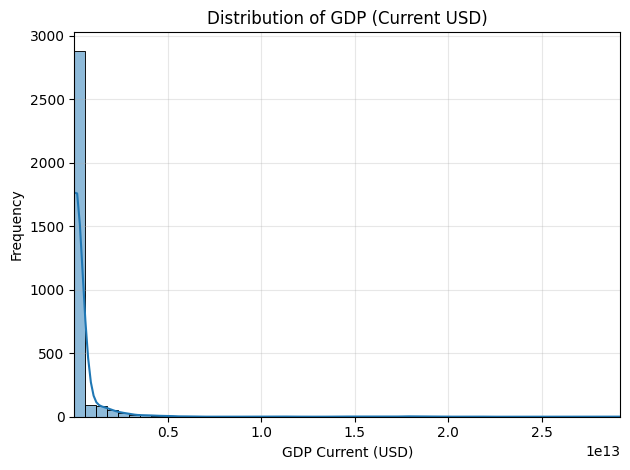

In [ ]:
sns.histplot(df['GDP (Current USD)'], bins=50, kde=True, edgecolor='black')
plt.title('Distribution of GDP (Current USD)')
plt.xlabel('GDP Current (USD)')
plt.ylabel('Frequency')
plt.xlim(df['GDP (Current USD)'].min(), df['GDP (Current USD)'].max())
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

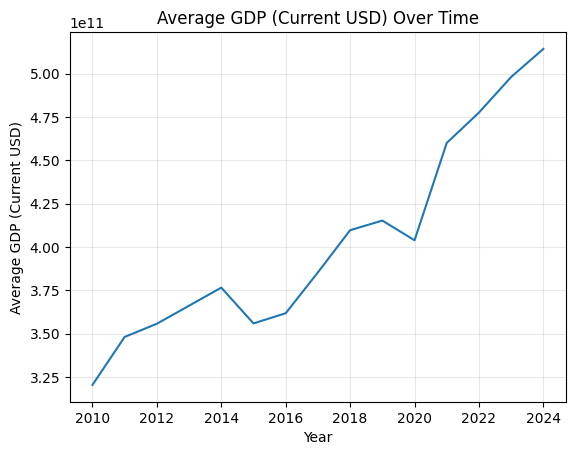

In [ ]:
average_gdp = df.groupby('year')['GDP (Current USD)'].mean()
average_gdp.plot(kind='line')
plt.title('Average GDP (Current USD) Over Time')
plt.xlabel('Year')
plt.ylabel('Average GDP (Current USD)')
plt.grid(alpha=0.3)
plt.show()

**Visualizing the GDP Per Capita distribution**

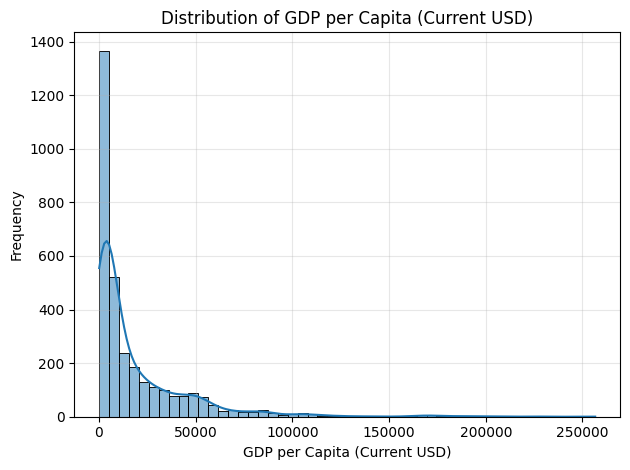

In [ ]:
sns.histplot(df['GDP per Capita (Current USD)'], bins=50, kde=True, edgecolor='black')
plt.title('Distribution of GDP per Capita (Current USD)')
plt.xlabel('GDP per Capita (Current USD)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

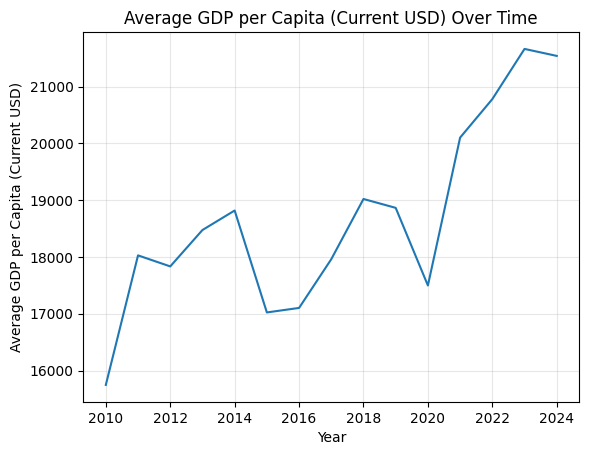

In [ ]:
# Calculate the average GDP per capita per year
average_gdp_per_capita = df.groupby('year')['GDP per Capita (Current USD)'].mean()
average_gdp_per_capita.plot(kind='line')
plt.title('Average GDP per Capita (Current USD) Over Time')
plt.xlabel('Year')
plt.ylabel('Average GDP per Capita (Current USD)')
plt.grid(alpha=0.3)
plt.show()

**Visualizing GDP Growth distribution**

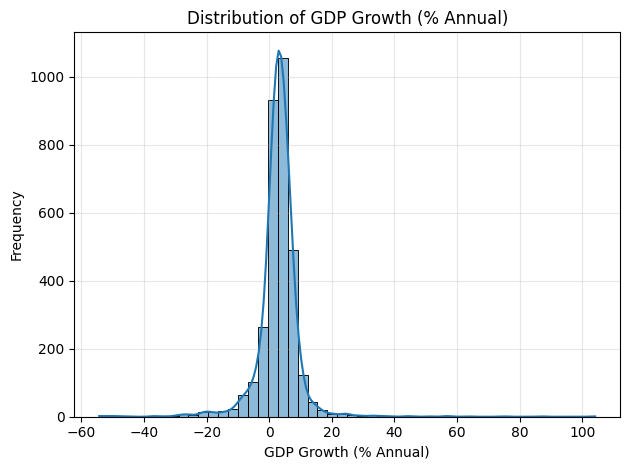

In [ ]:
sns.histplot(df['GDP Growth (% Annual)'], bins=50, kde=True, edgecolor='black')
plt.title('Distribution of GDP Growth (% Annual)')
plt.xlabel('GDP Growth (% Annual)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

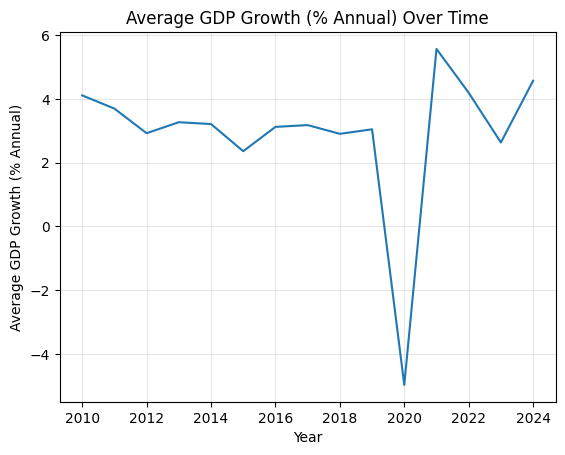

In [ ]:
average_gdp_growth = df.groupby('year')['GDP Growth (% Annual)'].mean()
average_gdp_growth.plot(kind='line')
plt.title('Average GDP Growth (% Annual) Over Time')
plt.xlabel('Year')
plt.ylabel('Average GDP Growth (% Annual)')
plt.grid(alpha=0.3)
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('world_bank_data_2025_cleaned.csv')

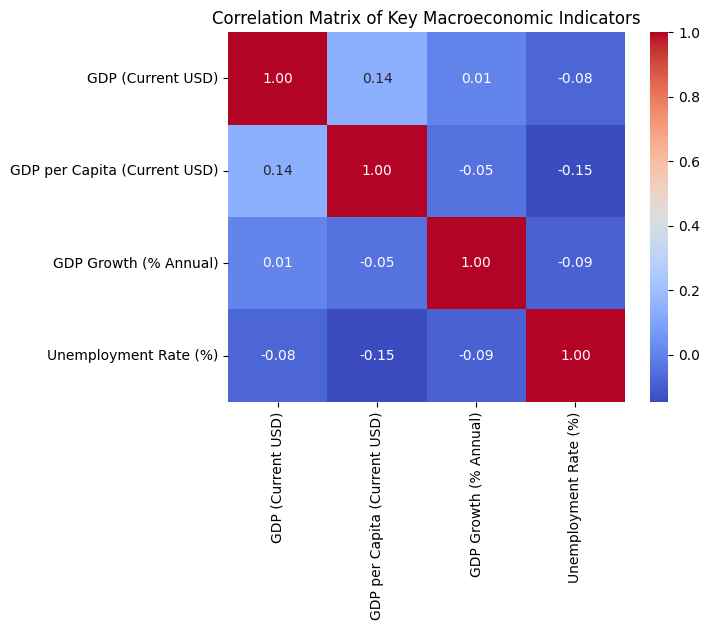

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#select the relevant columns
correlation_df = df[['GDP (Current USD)', 'GDP per Capita (Current USD)', 'GDP Growth (% Annual)', 'Unemployment Rate (%)']]

#calculate the correlation matrix
correlation_matrix = correlation_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Macroeconomic Indicators')
plt.show()

**Country Performance Analysis**

In [ ]:
country_perf = (
    df.groupby('country_name')
    .agg({
        'GDP (Current USD)': 'mean',
        'GDP per Capita (Current USD)': 'mean',
        'GDP Growth (% Annual)': 'mean'
    })
    .reset_index()
)


Check for Top 5 countries by GDP Per Capita

In [ ]:
#sort by GDP per Capita as a proxy for performance
top5 = country_perf.sort_values(by='GDP per Capita (Current USD)', ascending=False).head(5)
top5

,country_name,GDP (Current USD),GDP per Capita (Current USD),GDP Growth (% Annual)
127,Monaco,7.050607e+09,190528.206400,2.667843
111,Liechtenstein,6.616728e+09,173625.626230,2.346635
113,Luxembourg,7.069759e+10,118670.666860,2.678096
21,Bermuda,7.111666e+09,111089.626900,0.218859
185,Switzerland,7.435616e+11,88150.097093,2.121631


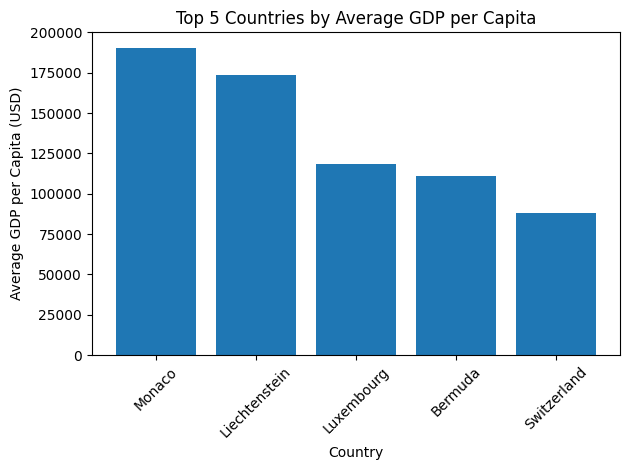

In [ ]:
plt.bar(top5['country_name'], top5['GDP per Capita (Current USD)'])
plt.title('Top 5 Countries by Average GDP per Capita')
plt.xlabel('Country')
plt.ylabel('Average GDP per Capita (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Check the Top 5 countries by GDP Current

In [ ]:
#sort by GDP  as a proxy for performance
top5 = country_perf.sort_values(by='GDP (Current USD)', ascending=False).head(5)
top5

,country_name,GDP (Current USD),GDP per Capita (Current USD),GDP Growth (% Annual)
203,United States,2.054985e+13,63062.273383,2.569145
40,China,1.279506e+13,9180.337851,6.733359
96,Japan,5.032637e+12,39729.587204,0.588962
72,Germany,3.935740e+12,47823.703412,1.556436
202,United Kingdom,2.913646e+12,44173.004577,2.062839


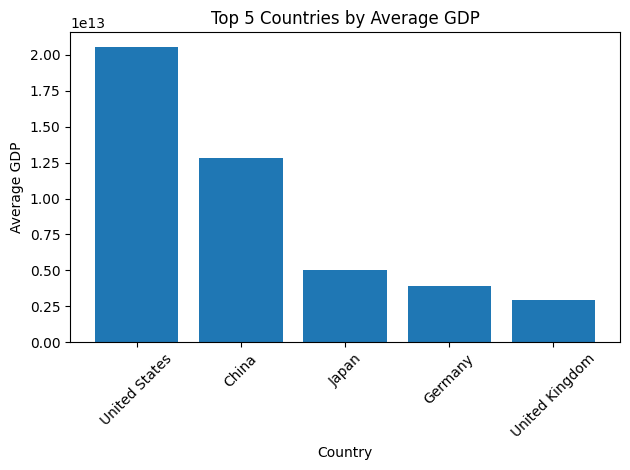

In [ ]:
plt.bar(top5['country_name'], top5['GDP (Current USD)'])
plt.title('Top 5 Countries by Average GDP')
plt.xlabel('Country')
plt.ylabel('Average GDP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Check the Top 5 countries by GDP Growth

In [ ]:
#sort by GDP growth as a proxy for performance
top5 = country_perf.sort_values(by='GDP Growth (% Annual)', ascending=False).head(5)
top5

,country_name,GDP (Current USD),GDP per Capita (Current USD),GDP Growth (% Annual)
81,Guyana,7.545425e+09,9423.080603,16.225759
53,Djibouti,2.791052e+09,2588.184583,8.813102
187,Tajikistan,8.685038e+09,946.585526,7.893065
196,Turkmenistan,4.301749e+10,6511.485714,7.850408
128,Mongolia,1.373495e+10,4317.267139,6.929415


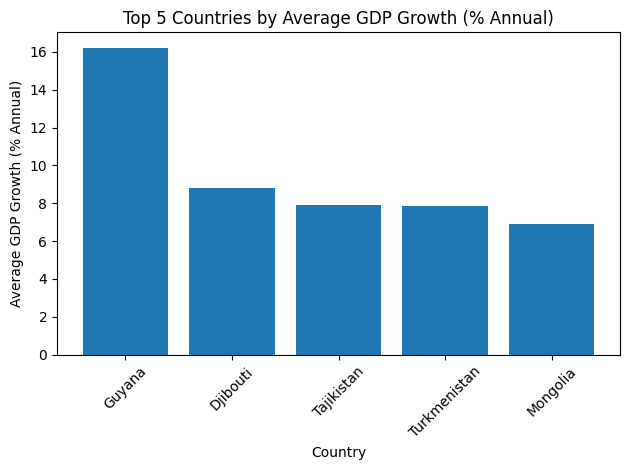

In [ ]:
plt.bar(top5['country_name'], top5['GDP Growth (% Annual)'])
plt.title('Top 5 Countries by Average GDP Growth (% Annual)')
plt.xlabel('Country')
plt.ylabel('Average GDP Growth (% Annual)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('world_bank_data_2025_cleaned.csv', index=False)